In [1]:
import ib_naming_model
import numpy as np
from tools import *

model = ib_naming_model.load_model()

2021-10-18 12:21:56,009 [INFO] [ib_naming_model - load_model] loading model from file: ./models/IB_color_naming_model/model.pkl


In [2]:
import pandas as pd

__CHIPS = pd.read_csv("./data/cnum-vhcm-lab-new.txt", delimiter="\t").sort_values(by="#cnum")
WCS_CNUMS = pd.read_csv("./data/chip.txt", delimiter="\t", header=None).values
WCS_CHIPS = __CHIPS[["L*", "a*", "b*"]].values

In [3]:
WCS_CHIPS.shape

(330, 3)

In [4]:
pW_M_fake = np.random.rand(330, 10)
pW_M_fake /= pW_M_fake.sum(axis=1)[:, None]
print(model.fit(pW_M_fake)[:-1])

(0.20574565138544632, 0.9673615654167846, 1.0076345431789737)


7.4123682189417135 4.371200132792319


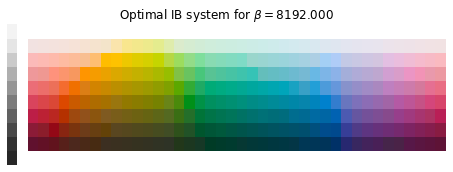

In [15]:
import matplotlib.pyplot as plt

indx = 1500
qW_M = model.qW_M[indx]
plt.figure(figsize=(6.4, 2.5))
model.mode_map(qW_M)
plt.title("Optimal IB system for $\\beta = %.3f$" % model.betas[indx])
plt.tight_layout()
print(model.complexity(qW_M), model.accuracy(qW_M))


(0.0, 4.471200132814856)

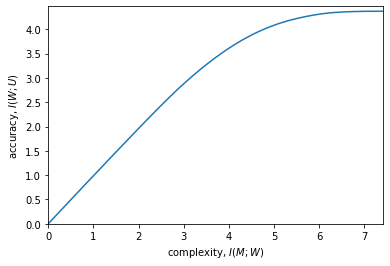

In [16]:
complexity, accuracy = model.IB_curve
plt.figure()
plt.plot(complexity, accuracy)
plt.xlabel("complexity, $I(M;W)$")
plt.ylabel("accuracy, $I(W;U)$")
plt.xlim([0, H(model.pM)])
plt.ylim([0, model.I_MU + 0.1])

In [58]:
complexity[100]

0.3624256013003926

In [55]:
accuracy[100]

0.35912087234948764

In [49]:
pW_M_fake = np.random.rand(330, 100)
pW_M_fake /= pW_M_fake.sum(axis=1)[:, None]
epsilon, gnid, bl, qW_M_fit = model.fit(pW_M_fake)

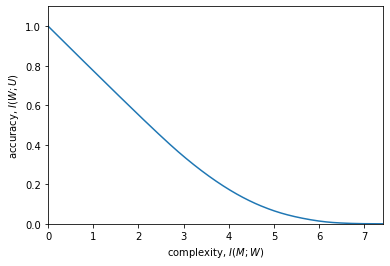

In [85]:
# epsilon
# gnid

complexity, accuracy = model.IB_curve
plt.figure()
plt.plot(complexity, 1-(accuracy/MI(model.pU_M * model.pM))) #@NOTE is this how to get information loss
plt.xlabel("complexity, $I(M;W)$")
plt.ylabel("accuracy, $I(W;U)$")
# plt.xlim([0, H(model.pM)])
# plt.ylim([0, model.I_MU + 0.1])
plt.xlim([0, H(model.pM)])
plt.ylim([0, 1.1])
plt.show()

# model.accuracy(qW_M_fit), model.complexity(qW_M_fit), bl

In [82]:
H(model.pM)

7.41236841563481

In [83]:
MI(model.pU_M * model.pM)

4.371200132814856